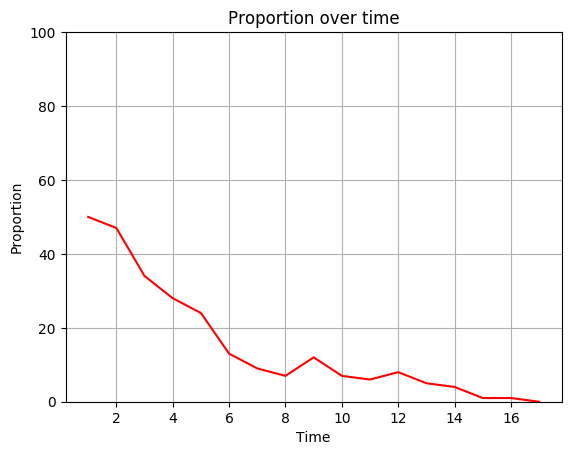

17


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fba477e9630>

In [6]:
using PyPlot

function nextGeneration!(populationSize, proportion)
    """Returns the proportion of the new generation, 
    using the old generation."""
    newProportion = 0
    for i in 1:populationSize
        # rand() gives a number in (0,1). Simulation of a random variable following a Bernoulli distribution
        # of parameter "proportion/populationSize"
        if rand() < proportion/populationSize
            newProportion += 1
        end
    end
    return newProportion
end


function nextGenerationSelection(populationSize, proportion, selectionFactor)
    """Returns the new vector of population and its characteristic, 
    using the vector of the old generation and its characteristic after applying a selection.
    1 is the state that dominates the other. The selection factor is a fixed (float) number."""
    
    #There is a min needed if the proportion after the selection exceeds the size of the population.
    proportionAfterSelection = min(proportion*(1+selectionFactor), populationSize)
    
    #Producing the next generation
    return nextGeneration!(populationSize, proportionAfterSelection)
    
end    

function trajectorySelection(populationSize, initialProportion, selectionFactor, finalTime)
    """Iteration of the algorithm with a mutation.
    finalTime is how many iterations you do."""
    
    listOfProportions = Float64[]
    infTimeAbsorption = 0
    
    # Initializing the population
    currentProportion = initialProportion
    
    # First proportion added to the plot
    push!(listOfProportions, currentProportion)

    for time in 2:finalTime
        
        initialProportion = nextGenerationSelection(populationSize, initialProportion, selectionFactor)
        
        # Getting the time of absorption
        if (initialProportion == 0 || initialProportion == populationSize)
            infTimeAbsorption = time
        end
        
        # Adding the proportion to the plot
        push!(listOfProportions, initialProportion)
        
        if (infTimeAbsorption != 0)
            finalTime = time
            break
        end
    end
    
    # Returns the time of absorption, 0 if there is none, and the entire trajectory.
    return infTimeAbsorption, listOfProportions
end

function plotTrajectory(populationSize, trajectory)
    """Plot a trajectory. populationSize is an argument so that we can fix the zoom."""
    ioff()
    
    listOfTimes = collect(1:length(trajectory))
    
    title("Proportion over time")
    xlabel("Time")
    ylabel("Proportion")
    ylim(0, populationSize)
    grid(true)
    
    plot(listOfTimes, trajectory, color="red")
end

#########################################################################################
# Plot of a trajectory
#########################################################################################
absorptionTime, traj = trajectorySelection(100, 50, -0.2, 100)
println(absorptionTime)
plotTrajectory(100, traj)